In [97]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import os
os.chdir('/home/ch3859/comp-class/comp-lab-class/Week5/')

## Free energy space of alanine dipeptide in phi, psi space 

GMX steps to run md simulation:

`module load gromacs/openmpi/intel/2018.3`

`gmx_mpi grompp -f adp_T300.mdp -c adp.gro -p adp.top -o adp_5ns.tpr`

`gmx_mpi mdrun -deffnm adp_5ns`

In [98]:
# load the trajectory from Input/adp_5ns.trr
traj = md.load_trr('Inputs/adp_5ns.trr', top='Inputs/adp_5ns.gro')

In [99]:
# compute the phi angles
phi = md.compute_phi(traj)
# compute the psi angles
psi = md.compute_psi(traj)

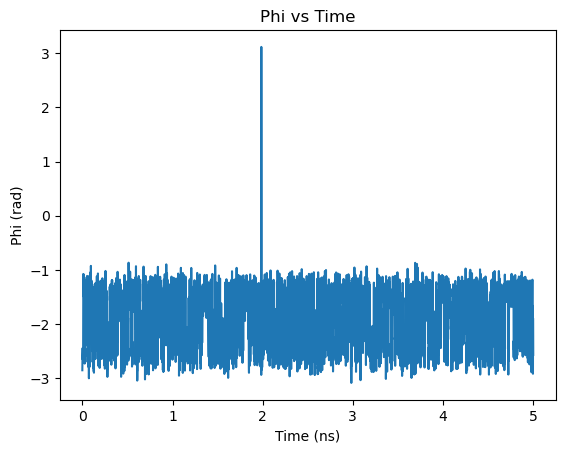

In [100]:
# plot phi vs time
plt.plot(traj.time / 1000, phi[1])
plt.xlabel('Time (ns)')
plt.ylabel('Phi (rad)')
plt.title('Phi vs Time')
plt.savefig('Figures/mdrun_phi.pdf')
plt.show()

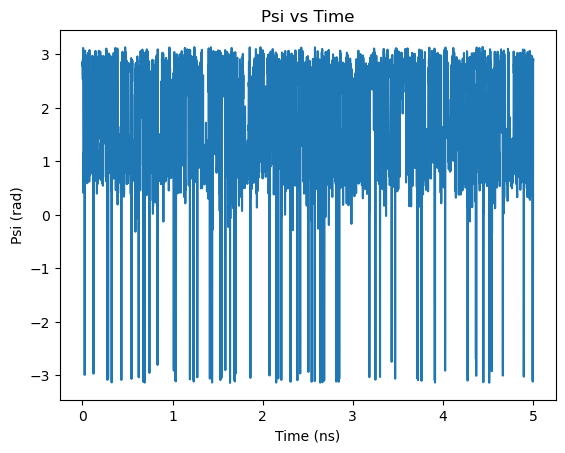

In [101]:
# plot psi vs time
plt.plot(traj.time / 1000, psi[1])
plt.xlabel('Time (ns)')
plt.ylabel('Psi (rad)')
plt.title('Psi vs Time')
plt.savefig('Figures/mdrun_psi.pdf')
plt.show()

The probability density function is:
$$P(\phi, \psi) = A e^{-E(\phi, \psi)/kT}$$
    
where $A$ is a normalization constant, $E(\phi, \psi)$ is the potential energy, and $kT$ is the thermal energy.

Using np.histogram2d with `normed=True`, the returned histogram $H$ is the sample density, which is the probability density function multiplied by the bin volume. The returned histogram is normalized to 1:

$H(\phi, \psi) = P(\phi, \psi) b^2$

where $b$ is the bin size.

$-ln(H) = -ln(Ab^2) + E(\phi, \psi)/kT$

Question: We can shift the zero of the potential energy to the minimum to eliminate the influence of $A$ and $b$. However, it is found that the value of bins can still affect the value range of the energy surface when plotting. 

/tmp/ipykernel_371446/587874973.py:4: RuntimeWarning: divide by zero encountered in log
  H = -np.log(H)


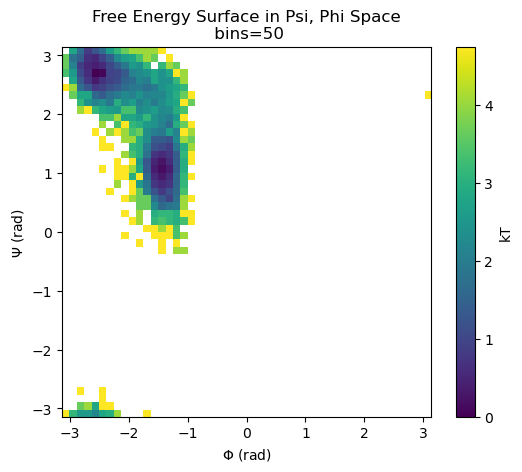

In [102]:
# compute a 2d histogram of the phi, psi data and plot the -log(histogram)
H, xedges, yedges = np.histogram2d(phi[1].flatten(), psi[1].flatten(), bins=50, normed=True)
H = H.T  # Histogram does not follow Cartesian convention, therefore transpose H for visualization purposes.
H = -np.log(H)
H = H - np.min(H)
plt.imshow(H, interpolation='nearest', origin='lower', extent=[-np.pi, np.pi, -np.pi, np.pi])
plt.xlabel('$\Phi$ (rad)')
plt.ylabel('$\Psi$ (rad)')
# plot colorbar with unit of kT
plt.colorbar(label='kT')
plt.title('Free Energy Surface in Psi, Phi Space\n bins=50')
plt.savefig('Figures/mdrun_fes.pdf')
plt.show()

## Parallel tempering

A bash file is used to run the parallel tempering simulation. Please check parallel_tempering.bash for details.

### T = (300 K, 350 K, 400 K, 450 K), 5ns md

/tmp/ipykernel_371446/2305381935.py:10: RuntimeWarning: divide by zero encountered in log
  H = -np.log(H)


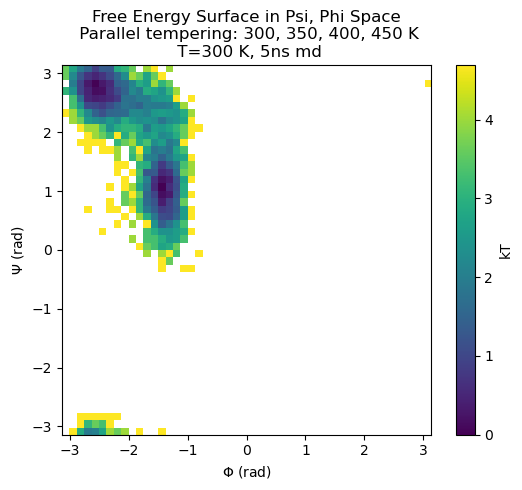

In [103]:
# load the trajectory from dT50_5ns_T300
traj_temp_exchange = md.load_trr('Inputs/dT50_5ns_T300/adp_exchange4temps.trr', top='Inputs/dT50_5ns_T300/adp_exchange4temps.gro')
# compute the phi angles
phi_temp_exchange = md.compute_phi(traj_temp_exchange)
# compute the psi angles
psi_temp_exchange = md.compute_psi(traj_temp_exchange)
# compute a 2d histogram of the phi, psi data and plot the -log(histogram)
H, xedges, yedges = np.histogram2d(phi_temp_exchange[1].flatten(), psi_temp_exchange[1].flatten(), bins=50)
H = H.T
H = -np.log(H)
H = H - np.min(H)
plt.imshow(H, interpolation='nearest', origin='lower', extent=[-np.pi, np.pi, -np.pi, np.pi])
plt.xlabel('$\Phi$ (rad)')
plt.ylabel('$\Psi$ (rad)')
plt.colorbar(label='kT')
plt.title('Free Energy Surface in Psi, Phi Space\n Parallel tempering: 300, 350, 400, 450 K\n T=300 K, 5ns md')
plt.savefig('Figures/temp_exchange_fes_dT50_5ns_T300.pdf')
plt.show()

Notice that in this setting there're 2 basins. We will further try higher temperature setting and longer simulation steps to find the third basin on the free energy surface.

### T = (300 K, 400 K, 500 K, 600 K), 10ns md

/tmp/ipykernel_371446/3110007023.py:9: RuntimeWarning: divide by zero encountered in log
  H = -np.log(H)


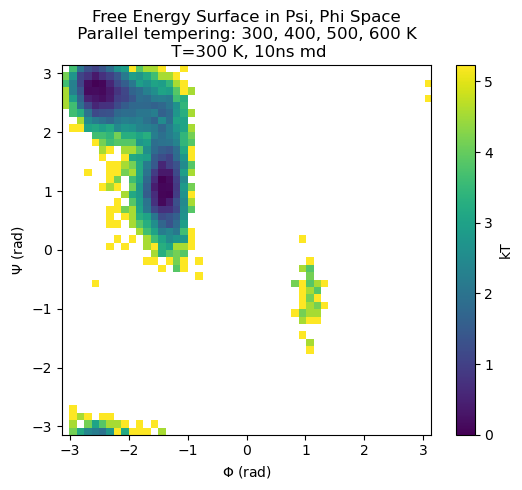

In [104]:
traj_temp_exchange = md.load_trr('Inputs/dT100_10ns_T300/adp_exchange4temps.trr', top='Inputs/dT100_10ns_T300/adp_exchange4temps.gro')
# compute the phi angles
phi_temp_exchange = md.compute_phi(traj_temp_exchange)
# compute the psi angles
psi_temp_exchange = md.compute_psi(traj_temp_exchange)
# compute a 2d histogram of the phi, psi data and plot the -log(histogram)
H, xedges, yedges = np.histogram2d(phi_temp_exchange[1].flatten(), psi_temp_exchange[1].flatten(), bins=50)
H = H.T
H = -np.log(H)
H = H - np.min(H)
plt.imshow(H, interpolation='nearest', origin='lower', extent=[-np.pi, np.pi, -np.pi, np.pi])
plt.xlabel('$\Phi$ (rad)')
plt.ylabel('$\Psi$ (rad)')
plt.colorbar(label='kT')
plt.title('Free Energy Surface in Psi, Phi Space\n Parallel tempering: 300, 400, 500, 600 K \n T=300 K, 10ns md')
plt.savefig('Figures/temp_exchange_fes_dT100_10ns_T300.pdf')
plt.show()

/tmp/ipykernel_371446/2117193354.py:9: RuntimeWarning: divide by zero encountered in log
  H = -np.log(H)


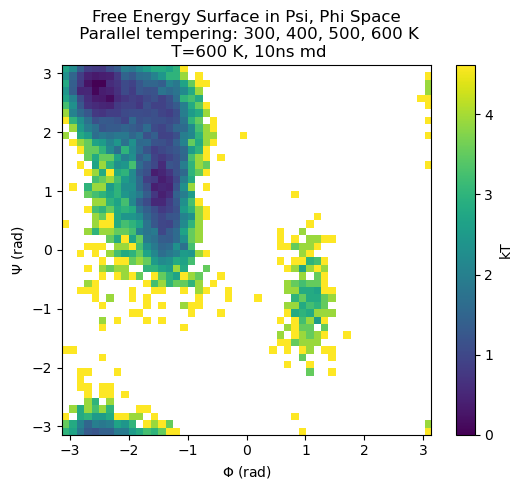

In [105]:
traj_temp_exchange = md.load_trr('Inputs/dT100_10ns_T600/adp_exchange4temps.trr', top='Inputs/dT100_10ns_T600/adp_exchange4temps.gro')
# compute the phi angles
phi_temp_exchange = md.compute_phi(traj_temp_exchange)
# compute the psi angles
psi_temp_exchange = md.compute_psi(traj_temp_exchange)
# compute a 2d histogram of the phi, psi data and plot the -log(histogram)
H, xedges, yedges = np.histogram2d(phi_temp_exchange[1].flatten(), psi_temp_exchange[1].flatten(), bins=50)
H = H.T
H = -np.log(H)
H = H - np.min(H)
plt.imshow(H, interpolation='nearest', origin='lower', extent=[-np.pi, np.pi, -np.pi, np.pi])
plt.xlabel('$\Phi$ (rad)')
plt.ylabel('$\Psi$ (rad)')
plt.colorbar(label='kT')
plt.title('Free Energy Surface in Psi, Phi Space\n Parallel tempering: 300, 400, 500, 600 K\n T=600 K, 10ns md')
plt.savefig('Figures/temp_exchange_fes_dT100_10ns_T600.pdf')
plt.show()

Under higher temperature the sampling around the third basin at (1, -1) has shown in both low temperature and high temperature simulation. 

### T = (300 K, 400 K, 500 K, 600 K), 20ns md

/tmp/ipykernel_371446/594627561.py:9: RuntimeWarning: divide by zero encountered in log
  H = -np.log(H)


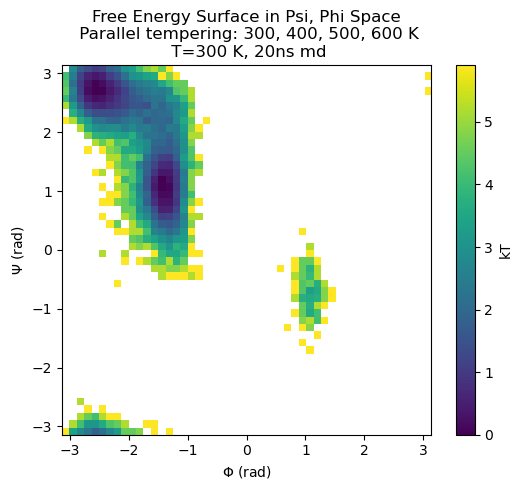

In [106]:
traj_temp_exchange = md.load_trr('Inputs/dT100_20ns_T300/adp_exchange4temps.trr', top='Inputs/dT100_20ns_T300/adp_exchange4temps.gro')
# compute the phi angles
phi_temp_exchange = md.compute_phi(traj_temp_exchange)
# compute the psi angles
psi_temp_exchange = md.compute_psi(traj_temp_exchange)
# compute a 2d histogram of the phi, psi data and plot the -log(histogram)
H, xedges, yedges = np.histogram2d(phi_temp_exchange[1].flatten(), psi_temp_exchange[1].flatten(), bins=50)
H = H.T
H = -np.log(H)
H = H - np.min(H)
plt.imshow(H, interpolation='nearest', origin='lower', extent=[-np.pi, np.pi, -np.pi, np.pi])
plt.xlabel('$\Phi$ (rad)')
plt.ylabel('$\Psi$ (rad)')
plt.colorbar(label='kT')
plt.title('Free Energy Surface in Psi, Phi Space\n Parallel tempering: 300, 400, 500, 600 K\n T=300 K, 20ns md')
plt.savefig('Figures/temp_exchange_fes_dT100_20ns_T300.pdf')
plt.show()

With longer simulation time, the sampling around the third basin at (1, -1) has become more clear and concentrated.

## Replica analysis

#### Visualize the replica exchange

Use demux.pl to generate files "replica_index.xvg  replica_temp.xvg" for dT100_20ns_T300:

`module load gromacs/openmpi/intel/2018.3`

`demux.pl adp_exchange4temps.log`

In [107]:
# read in xvg files from dT100_20ns_T300
replica_index = np.loadtxt('Inputs/dT100_20ns_T300/replica_index.xvg')
replica_temp = np.loadtxt('Inputs/dT100_20ns_T300/replica_temp.xvg')

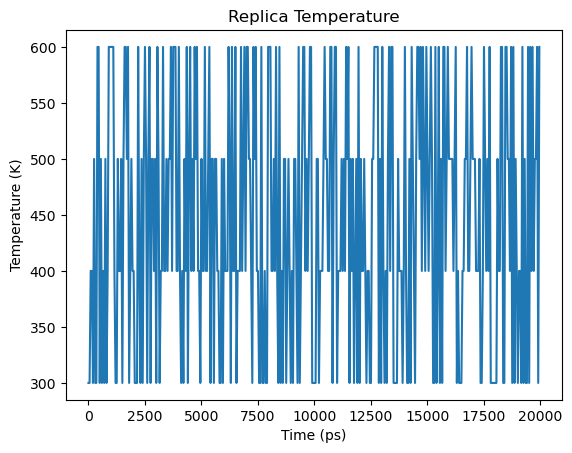

In [108]:
# plot the replica temperature every 500 steps
idx_every_500 = np.arange(0, len(replica_temp), 500)
replica_temp_every_500 = replica_temp[idx_every_500, 1]
# change the replica index into temperature
replica_temp_every_500[replica_temp_every_500 == 0] = 300
replica_temp_every_500[replica_temp_every_500 == 1] = 400
replica_temp_every_500[replica_temp_every_500 == 2] = 500
replica_temp_every_500[replica_temp_every_500 == 3] = 600
plt.plot(replica_temp[idx_every_500,0], replica_temp_every_500)
plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('Replica Temperature')
plt.savefig('Figures/replica_temp_dT100_20ns_T300.pdf')
plt.show()

In [109]:
# calculate the exchange probability
exchange_prob = np.zeros_like(replica_temp[:, 1])
for i in range(1, len(exchange_prob)):
    if replica_index[i, 1] != replica_index[i-1, 1]:
        exchange_prob[i] = 1
    else:
        exchange_prob[i] = 0
print('exchange probability: ', np.sum(exchange_prob)/len(exchange_prob))

exchange probability:  0.181795


A good exchange probability should be around 0.2-0.3. In this case, it's slightly lower than 0.2.

#### Potential energy in each replica

Use gmx_mpi energy to calculate the potential energy in each replica:

`gmx_mpi energy -f adp_exchange4temps.edr -o replica_energy.xvg`

From the plot we can see that the potential energy in each replica is overlapping well.

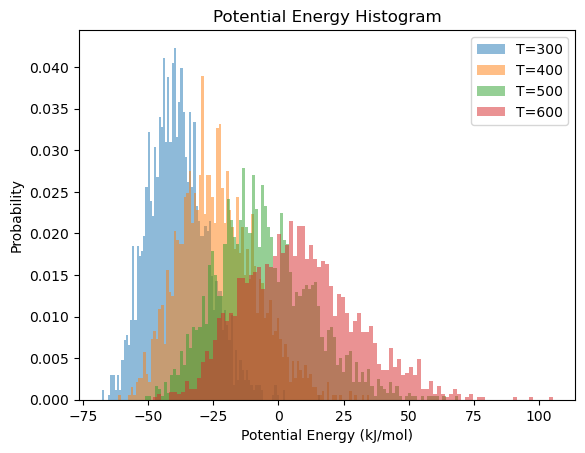

In [110]:
# plot the histogram of potential energies of each replica
replica_energy = []
for i in [300, 400, 500, 600]:
    potential_energy = np.loadtxt('Inputs/dT100_20ns_T{}/potential_energy.xvg'.format(i), skiprows=24)
    replica_energy.append(potential_energy)
    plt.hist(potential_energy[:,1], bins=100, alpha=0.5, label='T={}'.format(i), density=True)
plt.xlabel('Potential Energy (kJ/mol)')
plt.ylabel('Probability')
plt.title('Potential Energy Histogram')
plt.legend()
plt.savefig('Figures/potential_energy_histogram_dT100_20ns_T300.pdf')
plt.show()